Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

#### <font color='orange'>Полезные ссылки:</font>
* Могу предложить обратить внимание на вот этот курс: https://vk.com/dlschool_mipt

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Радует, что проект хорошо структурирован. Приятно проверять такие работы.
* Я оставил несколько советов. Пожалуйста, обрати на них внимание.
* Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
* Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Проект зачтен!
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в дальнейшем обучении и следующих работах! С наступающим!

# Определение возраста покупателей

## Исследовательский анализ данных

In [35]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [3]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [4]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [5]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что ты не забываешь про первичный анализ загруженных файлов.
</div>

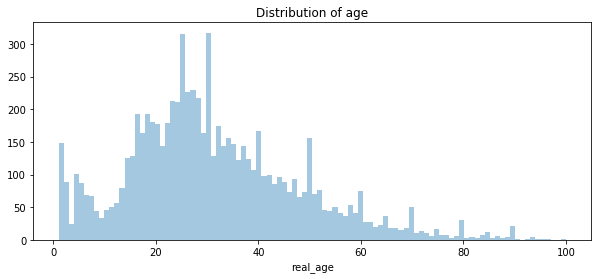

In [6]:
plt.figure(figsize=(10,4))
sns.distplot(labels.real_age, kde=False, bins=100)
plt.title("Distribution of age")
plt.show()

Большинство данных относятся к людям в возрасте 20-25 лет. И есть несколько пиков в 20, 40, 50, 60 и 80 лет. например, возможно, это результат округления или подстановки пропущенных чисел. Также есть много точек данных, которые помечены как 0-5 лет. На мой взгляд, мы можем отбросить эти нули, поскольку они на самом деле не оказывают положительного влияния на наши результаты.

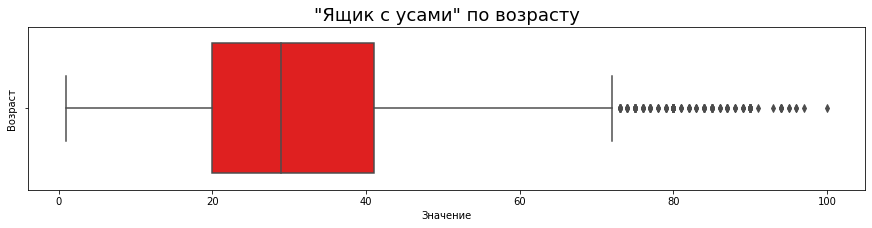

In [7]:
plt.figure(figsize=(15,3))
sns.boxplot(labels['real_age'], color='r').set(xlabel='Значение', ylabel='Возраст')                          
plt.title(label='"Ящик с усами" по возрасту', fontdict={'fontsize': 18})
plt.show()

По графикам видно, что распределение выборки имеет вид ближе к ассеметричному(возможно, можно назвать бимодальным распределением, т.к. есть два ярко выраженных пика, но это не точно) плюс со смещением вправо.
Медиана - 29 лет, q1 и q3 - 20 и 41 соответственно.
Нижний 'ус' и верхний 'ус' - 1 и 72 соответственно.

In [69]:
class_names = labels.real_age
print(class_names)

0        4
1       18
2       80
3       50
4       17
        ..
7586    14
7587    37
7588    28
7589    20
7590    47
Name: real_age, Length: 7591, dtype: int64


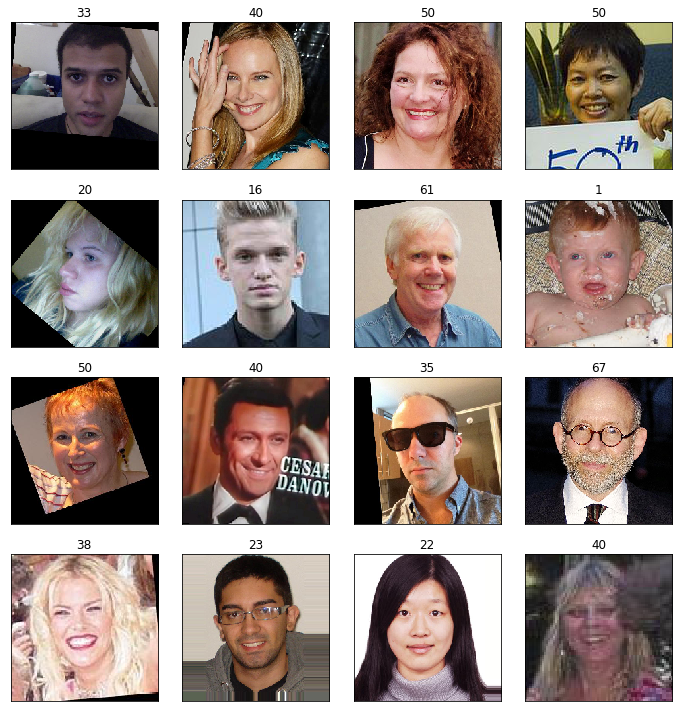

In [85]:
features, target = next(train_gen_flow)

fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.title(F'{target[i]}')
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Модели может быть непросто научиться предсказывать возраст человека с бородой, к тому же некоторые фотографии наклонены и не отцентрированы, а вокруг них есть черные пятна, что тоже нехорошо. Фотографии были сделаны в разных местах, и освещение неодинаковое, поэтому модель могла обратить на него внимание и сделать прогноз в зависимости от яркости фотографии.

<div class="alert alert-block alert-success">
<b>Успех:</b> Анализ проведен хорошо.
</div>


<div class="alert alert-block alert-info">
<b>Совет: </b> В названиях (title) изображений можно указать возраст.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Добавил, но почему то не смог добавить сло "Age", подскажи как это сделать.
</div>

<div class="alert alert-block alert-info">

<b>Совет (ревью 2): </b> Вот так: `plt.title(f'age: {target[i]}')`
</div>

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd

In [ ]:
def load_train(path):

    df = pd.read_csv('/datasets/faces/labels.csv')

    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        validation_split=0.2)

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=df,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

def load_test(path):

    df = pd.read_csv('/datasets/faces/labels.csv')

    valid_datagen = ImageDataGenerator(
        rescale=1. / 255, 
        validation_split=0.2)

    validation_gen_flow = valid_datagen.flow_from_dataframe(
        dataframe=df,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return validation_gen_flow

def create_model(input_shape):

    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet',
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=5,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

Train for 190 steps, validate for 48 steps
Epoch 1/5
2021-12-27 06:54:24.180125: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-12-27 06:54:24.476066: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
190/190 - 44s - loss: 262.0521 - mae: 11.5785 - val_loss: 969.7401 - val_mae: 26.2469
Epoch 2/5
190/190 - 37s - loss: 64.0067 - mae: 6.0573 - val_loss: 917.6525 - val_mae: 25.2904
Epoch 3/5
190/190 - 37s - loss: 32.2626 - mae: 4.3271 - val_loss: 301.7369 - val_mae: 12.7685
Epoch 4/5
190/190 - 37s - loss: 19.1915 - mae: 3.3962 - val_loss: 109.9703 - val_mae: 8.0861
Epoch 5/5
190/190 - 36s - loss: 15.9706 - mae: 3.1019 - val_loss: 82.4106 - val_mae: 6.8092
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
48/48 - 7s - loss: 82.4106 - mae: 6.8092
Test MAE: 6.8092

![image.png](attachment:image.png)

Данные распределены не равномерно, медиана 29 лет, основная масса от 20 до 41 года. Имеем более молодое поколение в выборке, а значит модель лучше обучиться на этом возрасте, а большие значения ошибки будут после возраста 72.

<div class="alert alert-block alert-success">
<b>Успех:</b> Модель определена верно.
</div>


<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно было добавить горизонтальный флип на тренировочной части. По сути это позволило бы увеличить выборку в 2 раза. Причем изображения полученные таким образом были бы неотличимы от настоящих.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения, я добавил горизонтальный и вертикальный флип и запустил модель, показало метрику хуже, чем без них, тогда я увеличил кол-во батчей до 50 и метрика получилась MSE 5,5.(код и снимок экрана ниже). Меня такой результат более, чем устраивает, но вопрос на сколько это верно, это же влияет на скорость. Плюс был бы признателен, если бы ты помог материалом по нейронным сетям, желательно легкого в усвоении(написанного понятным языком). ))
</div>

<div class="alert alert-block alert-info">

<b>Совет (ревью 2): </b> 

1. Вертикальный флип не имеет смысла, так как данные полученные таким образом не похожи на настоящие.
2. Это влияет только на скорость обучения, а она не очень важна. Скорость применения не изменится. 
3. Самое понятное из того, что я видел – это курс лекций от  https://vk.com/dlschool_mipt , там есть и текстовые материалы.
</div>

![image-2.png](attachment:image-2.png)

## Анализ обученной модели

ВЫВОД:

Обученная свёрточная нейронная сеть ResNet50 показала метрику качества 6.8, что довольно хороший результат (В статье о датасете, с которым работали, значение MAE равно 5.4).
Нейронная сеть ошибается в среднем на 6.8 года при прогнозе возраста по фото. Это дает возможность:
Проанализировав покупки, можно предлагать на кассе товары, которые могут заинтересовать покупателей этой возрастной группы.

Нейронная сеть соответствует поставленной задаче сетевого супермаркета и может быть внедрена в систему слежения, что повысит средний чек покупателей за счет рекомендации потенциально интересных товаров для возрастных групп, а также снизит риск продажи алкоголя и табака несовершеннолетним,если ещё чуть повысить точность MAE.

ВЫВОД:

Посел настройки модели удалось получить метрику MAE 5.5.


<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть подробный вывод в конце проекта!
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [ ]  MAE модели не больше 8
- [ ]  Код обучения модели скопирован в финальную тетрадь
- [ ]  Результат вывода модели на экран перенесён в финальную тетрадь
- [ ]  По итогам обучения модели сделаны выводы